## CNN + Bidirectional LSTM neural network was built to solve NLP multilable prediction problem with imbalance data. 

## Applied NLP augmentation technique (nlpaug) and compared with original dataset result.

## Applied reduction of majority sample size and compared with original dataset result. 

## Data is downloaded from this public GitHub repo:

https://github.com/MarletteFunding/marlette-ds-challenge2

# **1. Build CNN/BiLSTM Neural Network**
## Evaluation by Document_ID

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Upload data from Google Drive

In [18]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
path='/content/drive/My Drive/Data_Sets/'
df_train = pd.read_csv(path+'NLP_task_train.csv.zip',header=0,index_col=0,compression='infer')
df_validate = pd.read_csv(path+'NLP_task_validate.csv.zip',header=0,index_col=0,compression='infer')

## Explore the data, Visulization target (Scores), handle missing data

In [3]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0
2,584193040,1909902,service,0,7,10.0
3,584203035,1910310,Thanks!,198,205,10.0
4,584200037,1910006,Thank you!,58,68,10.0


In [4]:
df_train.tail()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
70657,689569033,3973028,good communication on each step,25,56,8.0
70659,689548036,3972918,Applying for this loan was a very easy experience,0,49,10.0
70660,689549033,3973010,Was very helpful and stayed on phone to make s...,0,103,10.0
70661,689564034,3973230,High Interest Rates,0,19,8.0
70662,689550033,3973221,I appreciate this loan opportunity from Best E...,63,120,10.0


In [5]:
df_validate.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
7,584207033,1910601,The loan process was super easy,0,31,10.0
10,584199033,1909801,The process was quick and easy!,0,31,9.0
13,591377035,2116637,were in my bank within just a few days from th...,178,252,10.0
14,591377035,2116635,"I do not know what you mean by ""my score"", but...",0,131,10.0
25,34211545,359794,Very expensive dental work and debt consolidat...,0,50,10.0


In [6]:
df_validate.tail()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE
70650,689544034,3973218,Also many options to choose from to fit my bud...,28,78,10.0
70652,689568034,3972921,paying bills,0,12,10.0
70655,689550034,3973223,It was quick and easy process,0,29,10.0
70656,689559033,3973021,Best Egg helped me to consolidate my high inte...,40,136,10.0
70658,689559033,3973023,Having paid off those loans and now needing an...,188,300,10.0


In [19]:
df_train.shape

(56644, 6)

In [20]:
df_validate.shape

(14019, 6)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56644 entries, 0 to 70662
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DOCUMENT_ID         56644 non-null  int64  
 1   SENTENCE_ID         56644 non-null  int64  
 2   SENTENCE            56623 non-null  object 
 3   SENTENCE_START_POS  56644 non-null  int64  
 4   SENTENCE_END_POS    56644 non-null  int64  
 5   SCORE               56644 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 3.0+ MB


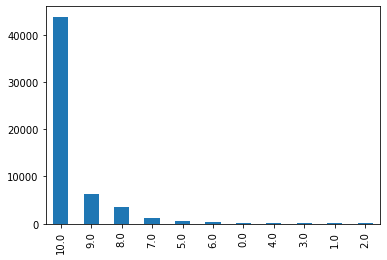

In [10]:
# Visualize SCORE distribution, total 11 scores, majority SCORE = 10
df_train['SCORE'].value_counts().plot(kind = 'bar')

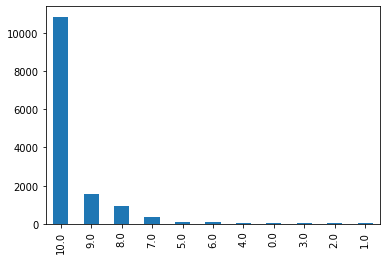

In [11]:
df_validate['SCORE'].value_counts().plot(kind = 'bar')

In [21]:
df_train.isnull().sum()

DOCUMENT_ID            0
SENTENCE_ID            0
SENTENCE              21
SENTENCE_START_POS     0
SENTENCE_END_POS       0
SCORE                  0
dtype: int64

In [22]:
#Remove the missing data 
df_train = df_train.dropna()

In [23]:
df_train.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              0
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 0
dtype: int64

In [24]:
df_train.shape

(56623, 6)

In [25]:
df_validate.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              4
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 1
dtype: int64

In [26]:
df_validate = df_validate.dropna()

In [27]:
df_validate.isnull().sum()

DOCUMENT_ID           0
SENTENCE_ID           0
SENTENCE              0
SENTENCE_START_POS    0
SENTENCE_END_POS      0
SCORE                 0
dtype: int64

In [28]:
df_validate.shape

(14014, 6)

## Preprocess Sentences

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
# Define preprocess function, remove stop words and punctuations etc.
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    wordList = text.split()
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    wordList = [word for word in wordList if word not in stop]
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)
clean_text("I Thank you!")

'thank'

In [31]:
# Clean train dataset
df_train["SENTENCE"] = df_train["SENTENCE"].astype("str")
df_train["clean_text"] = df_train["SENTENCE"].apply(clean_text)

In [32]:
# Clean validate dataset
df_validate["SENTENCE"] = df_validate["SENTENCE"].astype("str")
df_validate["clean_text"] = df_validate["SENTENCE"].apply(clean_text)

In [33]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE,clean_text
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0,whole process went smooth thankful
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0,quick easy apply got approval quickly
2,584193040,1909902,service,0,7,10.0,service
3,584203035,1910310,Thanks!,198,205,10.0,thanks
4,584200037,1910006,Thank you!,58,68,10.0,thank


In [25]:
#save cleaned data to Google drive
df_train.to_csv(path_or_buf='/content/drive/My Drive/Data_Sets/NLP_train.csv')
df_validate.to_csv(path_or_buf='/content/drive/My Drive/Data_Sets/NLP_validate.csv')

In [ ]:
#upload the cleaned data
#df_train = pd.read_csv('/content/drive/My Drive/Data_Sets/NLP_train.csv')
#df_validation = pd.read_csv('/content/drive/My Drive/Data_Sets/NLP_validate.csv')

In [ ]:
#df_train['cat_score']=df_train.SCORE.astype('category').cat.codes

In [ ]:
df_train.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE,clean_text
0,583306034,1888104,The whole process went smooth and I am thankfu...,109,165,10.0,whole process went smooth thankful
1,583306034,1888102,It was quick and easy to apply and got the app...,0,60,10.0,quick easy apply got approval quickly
2,584193040,1909902,service,0,7,10.0,service
3,584203035,1910310,Thanks!,198,205,10.0,thanks
4,584200037,1910006,Thank you!,58,68,10.0,thank


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56623 entries, 0 to 70662
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DOCUMENT_ID         56623 non-null  int64  
 1   SENTENCE_ID         56623 non-null  int64  
 2   SENTENCE            56623 non-null  object 
 3   SENTENCE_START_POS  56623 non-null  int64  
 4   SENTENCE_END_POS    56623 non-null  int64  
 5   SCORE               56623 non-null  float64
 6   clean_text          56623 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.5+ MB


## Import dependences

In [34]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
from keras import backend as K

In [35]:
from keras.preprocessing import text, sequence
from keras import optimizers
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D, Conv1D, GRU, LSTM, MaxPooling1D, GlobalMaxPool1D
from keras.layers.wrappers import Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import gc



##Split xtrain, ytrain from df_train; xtest, ytest from df_validate;
## one hot encoder 'SCORE'

In [68]:
xtrain = df_train['clean_text']
ytrain = df_train['SCORE']
xtest = df_validate['clean_text']
ytest = df_validate['SCORE']

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytrain.values.reshape(-1,1))
max_len=100
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xtrain = sequence.pad_sequences(xtrain, maxlen = max_len).astype(np.int32)
ytrain = ohe.transform(ytrain.values.reshape(-1,1)).astype(np.uint8)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
#del X, y
#gc.collect()

## Build word embedding matrix from glove 100d

In [ ]:
f= open('/content/drive/My Drive/Data_Sets/glove.6B.100d.txt', 'r', encoding='utf-8')
embeddings_index={}
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except ValueError:
        pass
f.close()

word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## Build CNN + Bidirectional LSTM Neural Network 
## Train the model

In [70]:
nlabels=11

model = Sequential()
model.add(Embedding(len(word_index)+1,
                           100,
                           weights=[embedding_matrix],
                           input_length=max_len,
                           trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
#model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.8))
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.8))
model.add(layers.Dense(nlabels, activation='softmax')) #'sigmoid'
model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['acc'])
model.summary()

batch=512
epoch=10

history = model.fit(xtrain, ytrain,
                    validation_split=0.2,
                    epochs=epoch,
                    batch_size=batch,
                   verbose=1)
score, acc = model.evaluate(xtest, ytest,
                            batch_size=batch)
#model.save('lstm_model.h5')



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          883300    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 47, 32)            6176      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 23, 32)          

In [71]:
model.save('/content/drive/My Drive/Data_Sets/lstm_model.h5')

## Plot loss and Accuracy vs. Epoch

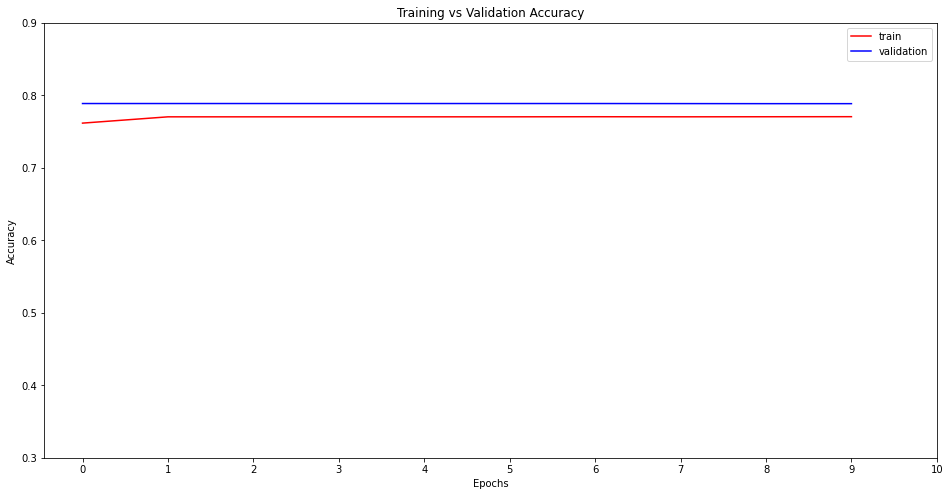

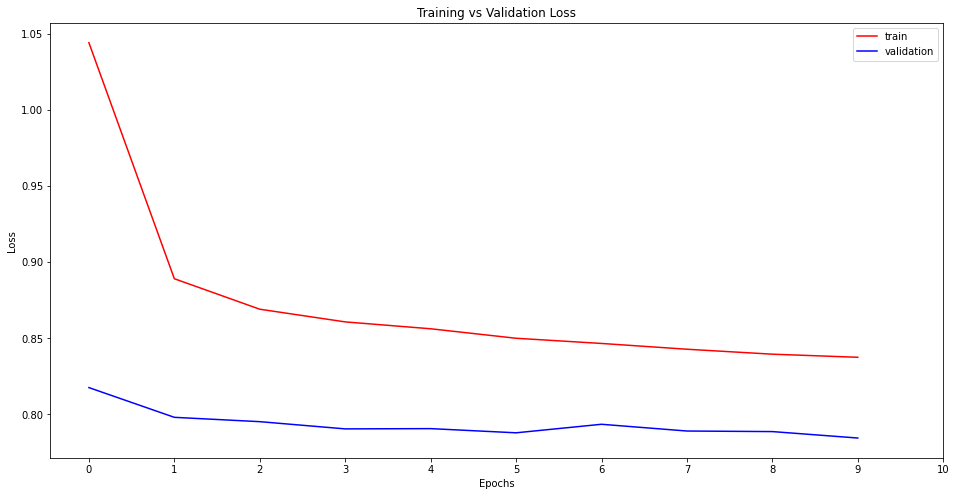

In [72]:
plt.figure(figsize = (16, 8))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

## Classification report, precision, recall, F1 score, support and ACC, Confusion matrix

In [73]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(ytest, axis=1)

In [74]:
from sklearn.metrics import classification_report
#classification_report(ytest, ypred, output_dict = True)
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00        97
           7       0.00      0.00      0.00       332
           8       0.26      0.01      0.03       904
           9       0.00      0.00      0.00      1562
          10       0.78      1.00      0.87     10864

    accuracy                           0.78     14014
   macro avg       0.09      0.09      0.08     14014
weighted avg       0.62      0.78      0.68     14014



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[    0     0     0     0     0     0     0     0     4     0    31]
 [    0     0     0     0     0     0     0     0     1     0    16]
 [    0     0     0     0     0     0     0     0     0     0    20]
 [    0     0     0     0     0     0     0     0     0     0    26]
 [    0     0     0     0     0     0     0     0     1     0    45]
 [    0     0     0     0     0     0     0     0     5     0   106]
 [    0     0     0     0     0     0     0     0     6     0    91]
 [    0     0     0     0     0     0     0     0     9     0   323]
 [    0     0     0     0     0     0     0     0    12     0   892]
 [    0     0     0     0     0     0     0     0     2     0  1560]
 [    0     0     0     0     0     0     0     0     6     0 10858]]


In [76]:
print(cm[8])

[  0   0   0   0   0   0   0   0  12   0 892]


## Prediction by Document_ID
### 1. Group the data using df.groupby() method for same ID you want to concatenate
### 2. Concatenate the string by using the join function and transform that value of that column using lambda statement

In [77]:
df_pred = df_validate[['DOCUMENT_ID', 'SCORE', 'clean_text']]

In [78]:
df_pred['clean_text'] = df_pred.groupby(['DOCUMENT_ID'])['clean_text'].transform(lambda x:''.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_pred = df_pred.drop_duplicates()

In [80]:
df_pred.head()

,DOCUMENT_ID,SCORE,clean_text
7,584207033,10.0,loan process super easy
10,584199033,9.0,process quick easy
13,591377035,10.0,bank within day day submitted requestknow mean...
25,34211545,10.0,expensive dental work debt consolidation
26,34211856,10.0,thanksquick service provided


In [81]:
df_pred.reset_index(drop=True, inplace=True)

In [82]:
len(df_pred['SCORE'].drop_duplicates())

11

In [88]:
xtest = df_pred['clean_text']
ytest = df_pred['SCORE']

In [89]:
xtest.shape

(9891,)

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytest.values.reshape(-1,1))
max_len=100
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtest)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)

In [ ]:
from keras import models
model = models.load_model('/content/drive/My Drive/Data_Sets/lstm_model.h5')


In [91]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(ytest, axis=1)

In [ ]:
ypred[-1]

10

In [92]:
from sklearn.metrics import classification_report
#classification_report(ytest, ypred, output_dict = True)
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00       221
           8       0.12      0.00      0.00       679
           9       0.00      0.00      0.00      1180
          10       0.77      1.00      0.87      7612

    accuracy                           0.77      9891
   macro avg       0.08      0.09      0.08      9891
weighted avg       0.60      0.77      0.67      9891



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[   0    0    0    0    0    0    0    0    2    0   20]
 [   0    0    0    0    0    0    0    0    0    0    7]
 [   0    0    0    0    0    0    0    0    0    0   10]
 [   0    0    0    0    0    0    0    0    0    0   14]
 [   0    0    0    0    0    0    0    0    0    0   17]
 [   0    0    0    0    0    0    0    0    1    0   65]
 [   0    0    0    0    0    0    0    0    1    0   62]
 [   0    0    0    0    0    0    0    0    1    0  220]
 [   0    0    0    0    0    0    0    0    1    0  678]
 [   0    0    0    0    0    0    0    0    0    0 1180]
 [   0    0    0    0    0    0    0    0    2    0 7610]]


In [94]:
df_pred['Prediction'] = ypred

In [95]:
df_pred['Evaluation'] = [[1]*11]*9891

In [96]:
cm[(int(10.0))]

array([   0,    0,    0,    0,    0,    0,    0,    0,    2,    0, 7610])

In [97]:
for index, row in df_pred.iterrows():
  df_pred['Evaluation'][index] = cm[int(row.SCORE)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
df_pred.head()

,DOCUMENT_ID,SCORE,clean_text,Prediction,Evaluation
0,584207033,10.0,loan process super easy,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
1,584199033,9.0,process quick easy,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1180]"
2,591377035,10.0,bank within day day submitted requestknow mean...,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
3,34211545,10.0,expensive dental work debt consolidation,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
4,34211856,10.0,thanksquick service provided,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"


In [99]:
df_pred.tail()

,DOCUMENT_ID,SCORE,clean_text,Prediction,Evaluation
9886,689811033,8.0,speed process taken excellent easy,10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 678]"
9887,689884033,10.0,quick easy low loan interest rate good credit,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
9888,689562033,5.0,prompt decision,10,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 65]"
9889,689568034,10.0,paying bill,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
9890,689550034,10.0,quick easy process,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"


In [ ]:
#xtest[1]   # 200 dimentions, padding first

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 1], dtype=int32)

# **2. Apply NLP Augmentation to 0-9 SCOREs by nlpaug**
## Augmentation for minority categories in training dataset

In [111]:
df_aug = df_train[['SENTENCE_ID', 'SCORE', 'clean_text']]
df_aug.head()

,SENTENCE_ID,SCORE,clean_text
0,1888104,10.0,whole process went smooth thankful
1,1888102,10.0,quick easy apply got approval quickly
2,1909902,10.0,service
3,1910310,10.0,thanks
4,1910006,10.0,thank


In [112]:
df_aug.reset_index(drop=True, inplace=True)

In [124]:
xtrain = df_aug['clean_text']

In [125]:
ytrain = df_aug['SCORE']

In [119]:
df_test = df_validate[['SENTENCE_ID', 'SCORE', 'clean_text']]

In [120]:
df_test.head()

,SENTENCE_ID,SCORE,clean_text
7,1910601,10.0,loan process super easy
10,1909801,9.0,process quick easy
13,2116637,10.0,bank within day day submitted request
14,2116635,10.0,know mean score found process qualify fund req...
25,359794,10.0,expensive dental work debt consolidation


In [121]:
df_test.reset_index(drop=True, inplace=True)

In [122]:
xtest = df_test['clean_text']
ytest = df_test['SCORE']

In [32]:
!pip install nlpaug


     |████████████████████████████████| 410 kB 5.4 MB/s 
     |████████████████████████████████| 11.3 MB 45.4 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [33]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 31.0 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 895 kB 43.2 MB/s 
     |████████████████████████████████| 61 kB 280 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [34]:
import nlpaug.augmenter.word as naw
# main parameters to adjust
ACTION = 'substitute' # or use 'insert'
TOP_K = 10 # randomly draw from top 10 suggested words
AUG_P = 0.40 # augment 40% of words within text
aug_bert = naw.ContextualWordEmbsAug(
model_path='bert-base-uncased',
action=ACTION,
top_k=TOP_K,
aug_p=AUG_P
)


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [35]:
aug_sentences=[]
aug_sent_labels=[]
for i in xtrain.index:
  if ytrain[i]==0.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(0.0)
  elif ytrain[i]==1.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(1.0)
  elif ytrain[i]==2.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(2.0)
  elif ytrain[i]==3.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(3.0)
  
  elif ytrain[i]==4.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(4.0)
  elif ytrain[i]==5.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(5.0)
  elif ytrain[i]==6.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(6.0)
  elif ytrain[i]==7.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(7.0)
  elif ytrain[i]==8.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(8.0)
  elif ytrain[i]==9.0:
    temps=aug_bert.augment(xtrain[i],n=2)
    for sent in temps:
      aug_sentences.append(sent)
      aug_sent_labels.append(9.0)
  else:
    continue
 

In [126]:
xtrain=xtrain.append(pd.Series(aug_sentences),ignore_index=True)
ytrain=ytrain.append(pd.Series(aug_sent_labels),ignore_index=True)

print(xtrain.shape)
print(ytrain.shape)

(82159,)
(82159,)


In [ ]:
xtrain.shape

In [117]:
ytrain.value_counts()

10.0    43832
9.0     18620
8.0     10863
7.0      3887
5.0      1542
6.0      1299
0.0       679
4.0       574
3.0       379
1.0       247
2.0       237
dtype: int64

In [107]:
xtrain.head()

0       whole process went smooth thankful
1    quick easy apply got approval quickly
2                                  service
3                                   thanks
4                                    thank
dtype: object

In [108]:
xtrain.tail()

82154         ease down...
82155      this third step
82156     that second step
82157    sudden interest ।
82158         high altar ।
dtype: object

In [127]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytrain.values.reshape(-1,1))
max_len=100
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xtrain = sequence.pad_sequences(xtrain, maxlen = max_len).astype(np.int32)
ytrain = ohe.transform(ytrain.values.reshape(-1,1)).astype(np.uint8)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)


In [43]:
f= open('/content/drive/My Drive/Data_Sets/glove.6B.100d.txt', 'r', encoding='utf-8')
embeddings_index={}
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except ValueError:
        pass
f.close()

word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
nlabels=11

model = Sequential()
model.add(Embedding(len(word_index)+1,
                           100,
                           weights=[embedding_matrix],
                           input_length=max_len,
                           trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
#model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.8))
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.8))
model.add(layers.Dense(nlabels, activation='softmax')) #'sigmoid'
model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['acc'])
model.summary()

batch=512
epoch=20

history = model.fit(xtrain, ytrain,
                    validation_split=0.2,
                    epochs=epoch,
                    batch_size=batch,
                   verbose=1)
score, acc = model.evaluate(xtest, ytest,
                            batch_size=batch)
#model.save('lstm_model.h5')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          883300    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_4 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 49, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 47, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 23, 32)          

In [ ]:
model.save('/content/drive/My Drive/Data_Sets/aug_lstm_model.h5')

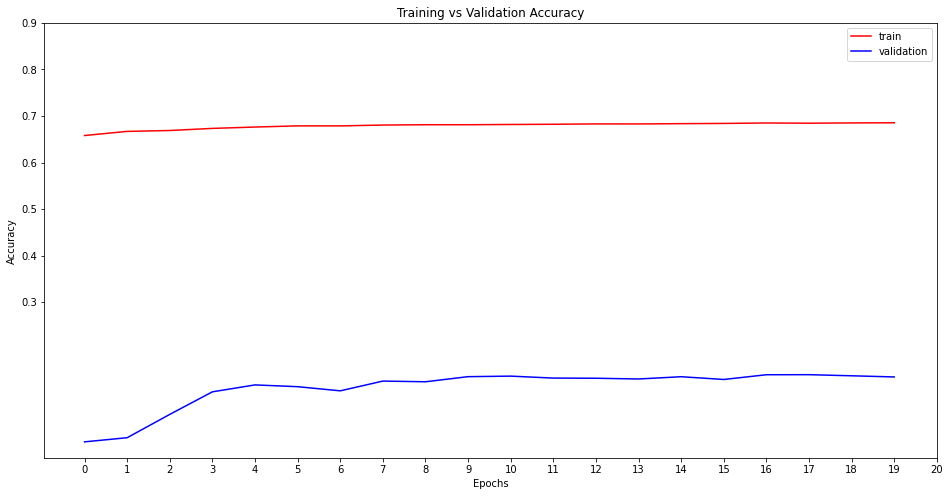

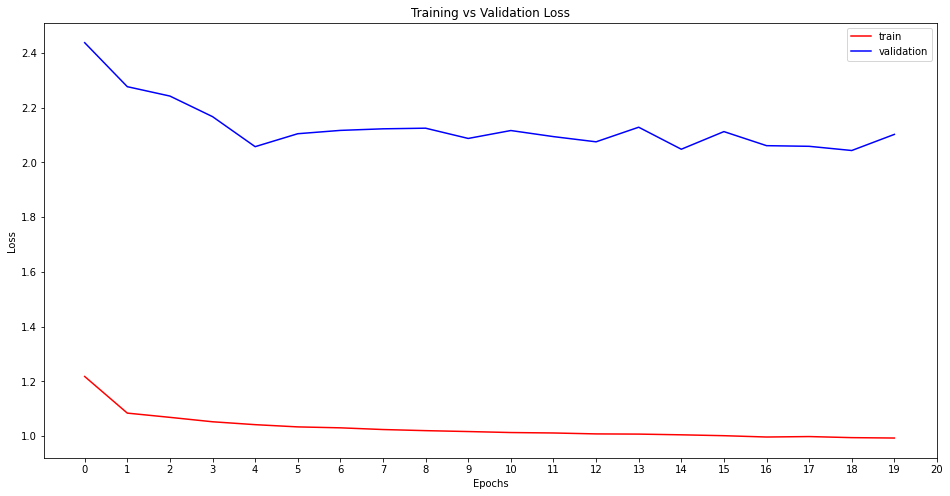

In [50]:
plt.figure(figsize = (16, 8))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

## Prediction by Document_ID

In [51]:
df_pred = df_validate[['DOCUMENT_ID', 'SCORE', 'clean_text']]

In [52]:
df_pred['clean_text'] = df_pred.groupby(['DOCUMENT_ID'])['clean_text'].transform(lambda x:''.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
df_pred = df_pred.drop_duplicates()

In [54]:
df_pred.head()

,DOCUMENT_ID,SCORE,clean_text
7,584207033,10.0,loan process super easy
10,584199033,9.0,process quick easy
13,591377035,10.0,bank within day day submitted requestknow mean...
25,34211545,10.0,expensive dental work debt consolidation
26,34211856,10.0,thanksquick service provided


In [55]:
df_pred.reset_index(drop=True, inplace=True)

In [56]:
xtest = df_pred['clean_text']
ytest = df_pred['SCORE']

In [57]:
xtest.shape

(9891,)

In [58]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytest.values.reshape(-1,1))
max_len=100
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtest)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)

In [59]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(ytest, axis=1)

In [60]:
from sklearn.metrics import classification_report
#classification_report(ytest, ypred, output_dict = True)
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        66
           6       0.00      0.00      0.00        63
           7       0.00      0.00      0.00       221
           8       0.08      0.01      0.02       679
           9       0.10      0.09      0.09      1180
          10       0.76      0.88      0.82      7612

    accuracy                           0.69      9891
   macro avg       0.09      0.09      0.08      9891
weighted avg       0.61      0.69      0.64      9891



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[   0    0    0    0    0    0    0    0    0    1   21]
 [   0    0    0    0    0    0    0    0    0    1    6]
 [   0    0    0    0    0    0    0    0    0    1    9]
 [   0    0    0    0    0    0    0    0    0    3   11]
 [   0    0    0    0    0    0    0    0    1    4   12]
 [   0    0    0    0    0    0    0    0    0    7   59]
 [   0    0    0    0    0    0    0    0    1    6   56]
 [   0    0    0    0    0    0    0    0    0   22  199]
 [   0    0    0    0    0    0    0    0    6   55  618]
 [   0    0    0    0    0    0    0    0    3  102 1075]
 [   0    0    0    0    0    1    0    0   60  840 6711]]


In [ ]:
df_pred['Prediction'] = ypred

In [ ]:
df_pred['Evaluation'] = [[1]*11]*9891

In [ ]:
for index, row in df_pred.iterrows():
  df_pred['Evaluation'][index] = cm[int(row.SCORE)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_pred.head()

,DOCUMENT_ID,SCORE,clean_text,Prediction,Evaluation
0,584207033,10.0,loan process super easy,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
1,584199033,9.0,process quick easy,10,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1180]"
2,591377035,10.0,bank within day day submitted requestknow mean...,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
3,34211545,10.0,expensive dental work debt consolidation,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"
4,34211856,10.0,thanksquick service provided,10,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 7610]"


In [ ]:
df_pred.tail()

In [ ]:
df_pred.to_csv(path_or_buf='/content/drive/My Drive/Data_Sets/NLP_Pred_by_Docum.csv')

# **3. Undersampling, reduce the majority (SCORE=10.0) size**

In [36]:
df_balance = df_train.copy()
df_balance = df_balance[1:30000] ## delete labels from first 80000 (dont want to delete all)
df_balance.drop(df_balance[df_balance['SCORE'] == 10.0].index, inplace = True)

# Add the rest of untouched rows
df_balance = pd.concat([df_balance,df_train[30001:]], axis=0)

In [37]:
df_balance.shape

(33595, 7)

In [38]:
df_balance.reset_index(drop=True, inplace=True)
df_balance.head()

,DOCUMENT_ID,SENTENCE_ID,SENTENCE,SENTENCE_START_POS,SENTENCE_END_POS,SCORE,clean_text
0,584204033,1910203,Ease and quickness of funding the loan,0,38,8.0,ease quickness funding loan
1,584199037,1909805,Payback APR and length of loan,0,30,9.0,payback apr length loan
2,584193044,1909907,Speedy process,0,14,9.0,speedy process
3,34211683,359955,"Ease, smoothness and speed of your process mad...",0,71,9.0,ease smoothness speed process made great exper...
4,34211693,359992,Vida financiera,0,15,8.0,vida financiera


In [39]:
df_balance['SCORE'].value_counts()

10.0    20804
9.0      6212
8.0      3625
7.0      1297
5.0       516
6.0       433
0.0       227
4.0       192
3.0       127
1.0        83
2.0        79
Name: SCORE, dtype: int64

In [40]:
xtrain = df_balance['clean_text']
ytrain = df_balance['SCORE']

In [41]:
xtrain.head()

0                          ease quickness funding loan
1                              payback apr length loan
2                                       speedy process
3    ease smoothness speed process made great exper...
4                                      vida financiera
Name: clean_text, dtype: object

In [42]:
df_test = df_validate[['SENTENCE_ID', 'SCORE', 'clean_text']]

In [43]:
df_test.reset_index(drop=True, inplace=True)

In [44]:
df_test.head()

,SENTENCE_ID,SCORE,clean_text
0,1910601,10.0,loan process super easy
1,1909801,9.0,process quick easy
2,2116637,10.0,bank within day day submitted request
3,2116635,10.0,know mean score found process qualify fund req...
4,359794,10.0,expensive dental work debt consolidation


In [45]:
xtest = df_test['clean_text']
ytest = df_test['SCORE']

In [46]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto',sparse=False)
ohe.fit(ytrain.values.reshape(-1,1))
max_len=100
max_num_words=20000
tokenizer = text.Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xtrain = sequence.pad_sequences(xtrain, maxlen = max_len).astype(np.int32)
ytrain = ohe.transform(ytrain.values.reshape(-1,1)).astype(np.uint8)

xtest = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(xtest, maxlen = max_len).astype(np.int32)
ytest = ohe.transform(ytest.values.reshape(-1,1)).astype(np.uint8)

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
#del X, y
#gc.collect()

In [47]:
f= open('/content/drive/My Drive/Data_Sets/glove.6B.100d.txt', 'r', encoding='utf-8')
embeddings_index={}
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except ValueError:
        pass
f.close()

word_index = tokenizer.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [48]:
nlabels=11

model = Sequential()
model.add(Embedding(len(word_index)+1,
                           100,
                           weights=[embedding_matrix],
                           input_length=max_len,
                           trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
#model.add(Bidirectional(GRU(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.8))
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.8))
model.add(layers.Dense(nlabels, activation='softmax')) #'sigmoid'
model.compile(loss='categorical_crossentropy',
                optimizer='adam', 
                metrics=['acc'])
model.summary()

batch=512
epoch=20

history = model.fit(xtrain, ytrain,
                    validation_split=0.2,
                    epochs=epoch,
                    batch_size=batch,
                   verbose=1)
score, acc = model.evaluate(xtest, ytest,
                            batch_size=batch)
#model.save('lstm_model.h5')



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          575800    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 47, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 23, 32)           0

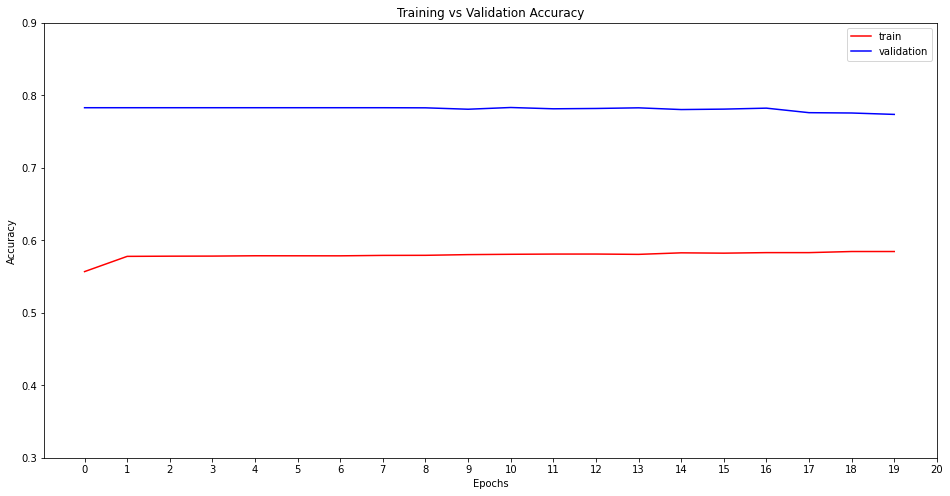

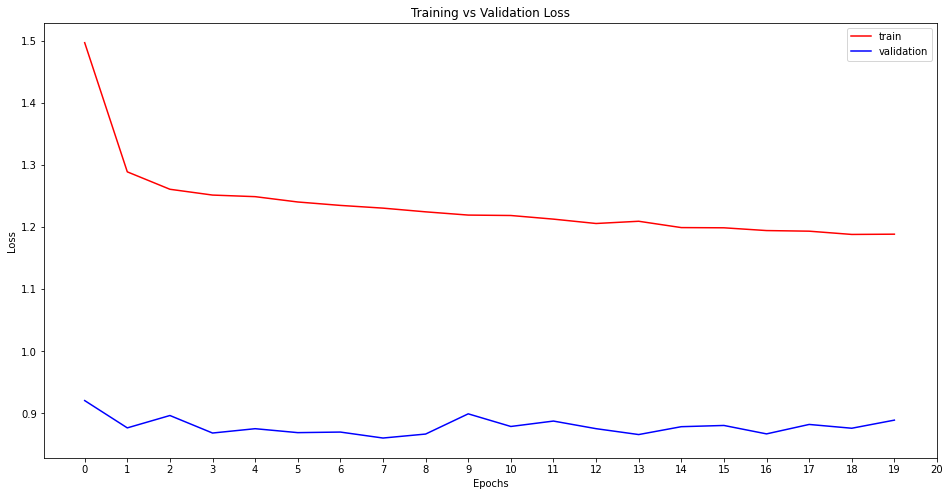

In [49]:
plt.figure(figsize = (16, 8))
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.figure(figsize = (16, 8))
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epoch + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [50]:
ypred = model.predict(xtest)
ypred = np.argmax(ypred, axis=1)
ytest = np.argmax(ytest, axis=1)

In [51]:
from sklearn.metrics import classification_report
target_names = ['0','1','2','3','4','5','6','7','8','9','10']
print(classification_report(ytest, ypred, target_names = target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00        97
           7       0.00      0.00      0.00       332
           8       0.20      0.11      0.14       904
           9       0.00      0.00      0.00      1562
          10       0.79      0.98      0.88     10864

    accuracy                           0.77     14014
   macro avg       0.09      0.10      0.09     14014
weighted avg       0.62      0.77      0.69     14014



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[    0     0     0     0     0     0     0     0    11     0    24]
 [    0     0     0     0     0     0     0     0     2     0    15]
 [    0     0     0     0     0     0     0     0     5     0    15]
 [    0     0     0     0     0     0     0     0     6     0    20]
 [    0     0     0     0     0     0     0     0    16     0    30]
 [    0     0     0     0     0     0     0     0    28     0    83]
 [    0     0     0     0     0     0     0     0    24     0    73]
 [    0     0     0     0     0     0     0     0    65     0   267]
 [    0     0     0     0     0     0     0     0   100     0   804]
 [    0     0     0     0     0     0     0     0    47     0  1515]
 [    0     0     0     0     0     0     0     0   199     0 10665]]


# Summary and Improvement:

## 1. CNN + Bidirectional LSTM neural network was built for NLP multilabels prediction with imbalance data. The acc reached 0.78, which is the same as Bidirectional GRU neural network; tweaked neural networks and hyperparameters, but didn't help to improve the performance. However, the runtime is more than 10 times fast with adding CNN layer.
## 2. Used NLP augmentation technique (nlpaug) to increase the minority classes' sample size, the train acc slightly decreased, but validation acc is much worse;
## 3. Reducing the majority sample size resulted in the decrease of train acc, but the validation acc is slightly decreased.

## Improvement:
## 1. Data quality is very important for neural network models training. Understand the domain knowledge of dataset, which may help the data preprocessing, such as combine some minority classes to be 1 class, reduce total number of classes.
## 2. Oversampling: For the words, using nlpaug, tried 'substitute', can try 'insert'.       
## 3. Undersampling: Try NearMiss technique, which remove majority samples near to minority samples, so that the minority classes can be well separated from majoroty class. 
## 4. Try transformer, BERT which might be outperformence GRU, LSTM etc. recurrent neural networks.

